In [1]:
import nltk
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
!pip install textblob

In [3]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
import pandas as pd
rawdf = pd.read_csv("aptsBK.csv",header=None)
rawdf.columns = ['Address', 'Neighborhood','Price','Apt Type','Bedrooms','Bathrooms','Rooms','Sqft','Description']

In [5]:
rawdf.dtypes

Address          object
Neighborhood     object
Price            object
Apt Type         object
Bedrooms        float64
Bathrooms       float64
Rooms           float64
Sqft             object
Description      object
dtype: object

In [6]:
rawdf[["Description"]].sample(10)

,Description
197,"OPEN HOUSE Sunday 10/14, 12-1pm. No Appointmen..."
225,Pure bliss. This classic townhouse floor throu...
548,Look no more! Come home to this spacious and q...
95,Tishman Speyer’s 11 Hoyt sets Brooklyn’s new s...
367,Discover Contemporary Bushwick Luxury at 139 G...
239,Built with great care and attention to details...
254,A large 3 family house in the heart of Midwood...
540,This Clinton Hill 1 bedroom is an impressive s...
158,The LOWEST price per SF for the incredible HAR...
250,Sunset Park has a burgeoning artist energy tha...


In [7]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
rawdf[["Description"]].sample(10)

,Description
370,boutique living in williamsburg prime! this sp...
215,by appointment only. combining innovative desi...
153,opportunity abounds in this three story plus b...
232,discover the unparalleled effect of integratin...
147,**the building is not for sale --only the busi...
277,"perfection on the park! this two bedroom, one ..."
400,welcome to 277 washington avenue apt. 1k. a la...
144,hillstone is a new development townhouse condo...
311,new to market! a rare offering awaits within t...
66,discover the unparalleled effect of integratin...


In [9]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: re.sub('\s+', ' ', x))

In [10]:
rawdf[["Description"]].head(10)

,Description
0,where x marks the spot in williamsburg northsi...
1,a phenomenal-once in a lifetime opportunity to...
2,532 clinton avenue is a development site in th...
3,"143 willow street, on one of brooklyn heights’..."
4,deal fell through & back on the market ...look...
5,rarely does such a show-stopping property come...
6,immediate occupancy! this massive sunny 5 bedr...
7,for immediate occupancy! this incredible 3 bed...
8,"introducing 672 st. marks, an architectural ma..."
9,double duplex. resting squarely within the bro...


In [11]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: re.sub('[^\w\s]','', x))

In [12]:
rawdf[["Neighborhood","Description"]].head(10)

,Neighborhood,Description
0,Williamsburg,where x marks the spot in williamsburg northsi...
1,Bay Ridge,a phenomenalonce in a lifetime opportunity to ...
2,Clinton Hill,532 clinton avenue is a development site in th...
3,Brooklyn Heights,143 willow street on one of brooklyn heights p...
4,Clinton Hill,deal fell through back on the market looking ...
5,Brooklyn Heights,rarely does such a showstopping property come ...
6,Brooklyn Heights,immediate occupancy this massive sunny 5 bedro...
7,Brooklyn Heights,for immediate occupancy this incredible 3 bedr...
8,Crown Heights,introducing 672 st marks an architectural mast...
9,Brooklyn Heights,double duplex resting squarely within the broo...


In [13]:
TextBlob(rawdf["Description"][10]).ngrams(2)

[WordList(['an', 'incredibly']),
 WordList(['incredibly', 'grand']),
 WordList(['grand', 'and']),
 WordList(['and', 'elegant']),
 WordList(['elegant', 'parlor']),
 WordList(['parlor', 'floor']),
 WordList(['floor', 'fourbedroom']),
 WordList(['fourbedroom', 'coop']),
 WordList(['coop', 'a']),
 WordList(['a', '2800sf']),
 WordList(['2800sf', 'brownstone']),
 WordList(['brownstone', 'duplex']),
 WordList(['duplex', 'is']),
 WordList(['is', 'a']),
 WordList(['a', 'rare']),
 WordList(['rare', 'property']),
 WordList(['property', 'in']),
 WordList(['in', 'the']),
 WordList(['the', 'center']),
 WordList(['center', 'of']),
 WordList(['of', 'historic']),
 WordList(['historic', 'brooklyn']),
 WordList(['brooklyn', 'heights']),
 WordList(['heights', 'and']),
 WordList(['and', 'is']),
 WordList(['is', 'a']),
 WordList(['a', 'duplex']),
 WordList(['duplex', 'apartment']),
 WordList(['apartment', 'in']),
 WordList(['in', 'the']),
 WordList(['the', '3unit']),
 WordList(['3unit', 'mansion']),
 WordLi

In [19]:
stop.extend(['home','apartment','building','offer','well','unit','offer','throughout','new york','offers','one','two','residence','floor'])

In [20]:
rawdf["Description"]=rawdf["Description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [21]:
wc = WordCloud(background_color="white", width=800, height=400,max_words=35)
wc.generate(''.join(rawdf["Description"]))

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

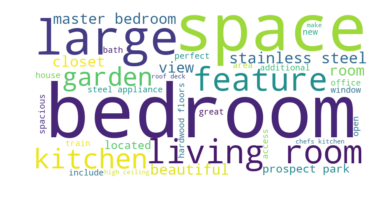

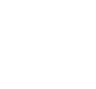

In [23]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(1, 1))
plt.axis("off")
plt.show()